**Tinder Relationship Prediction : A Classification Problem**
---

---
**PROBLEM STATEMENT : If a relationship will be successful or not with respect to various factors such as 'Medium of Usage', 'Name of Universities', 'Answer to : Do you use tinder ?', 'Count of Tinder Match', 'Percentage of Tinder Match'.**

## Importing the Libraries and Datasets
---

In [40]:
# Import necessary library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import ttest_ind

%matplotlib inline

### First glance of the data
---

#### Training Set

In [41]:
# Train data
df_class_train = pd.read_csv('train.csv')
df_class_train.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


#### Data Description
----------------

* ID : User id

* Segment type : Medium of Usage

* Segment Description : Name of Universities

* Answer : Do you use tinder ?

* Count : Number of Matches

* Percentage : % of matches (the value ranges from 0 to 1 as it is not multiplied with 100)

* It became a relationship : Success of relationship (Target)

## Analysis on Training Set
---

In [42]:
# Check data types of the columns of the dataset
df_class_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1896 non-null   float64
 1   Segment type              1896 non-null   object 
 2   Segment Description       1896 non-null   object 
 3   Answer                    1896 non-null   object 
 4   Count                     1896 non-null   float64
 5   Percentage                1896 non-null   float64
 6   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 103.8+ KB


In [43]:
# Check the dimension of the training set
df_class_train.shape

(1896, 7)

In [44]:
# Check the Null value count of the training set
df_class_train.isnull().sum()

ID                          0
Segment type                0
Segment Description         0
Answer                      0
Count                       0
Percentage                  0
It became a relationship    0
dtype: int64

In [45]:
# Check the summary statistics of the training set
df_class_train.describe()

,ID,Count,Percentage,It became a relationship
count,1896.000000,1896.000000,1896.000000,1896.000000
mean,292999.394750,446.881267,0.254098,0.350738
std,227.809806,494.110578,0.220809,0.477327
min,292881.000000,0.000000,0.000000,0.000000
25%,292888.196925,0.000000,0.000000,0.000000
50%,292893.904400,400.439633,0.257873,0.000000
75%,292902.568750,845.560798,0.396787,1.000000
max,293785.000000,1969.000000,1.000000,1.000000


Remarks:
* There are no missing values for the numerical columns as the dimension of the dataset is (1896 , 7) and the count seen for every column here is 1896.
* From the mean value(0.350738) of the column "It became a relationship" we can indicate that 30% of the values are 1s, and 70% are 0s.
* For the columns 'Count' : the mean and median(50%) has a difference of 46, which is relatively small compared to the standard deviation of 494. This means that although there might be some skewness, the large variability might mask it.
* For the columns 'Percentage' : We see a very small difference between the mean and median which suggests that the distribution is not significantly skewed. The standard deviation (0.220809) indicates the spread of the data around the mean.

In [46]:
# Skewness of the columns 'Count' and 'Percentage'

skew_Count = df_class_train['Count'].skew()
skew_Percentage = df_class_train['Percentage'].skew()

print (f'Skewness coefficient of the column Count : {skew_Count}')
print (f'Skewness coefficient of the column Percentage : {skew_Percentage}')

Skewness coefficient of the column Count : 0.7163670844235213
Skewness coefficient of the column Percentage : 0.8169399719310787


Remarks : 
* We see both the columns(Count and Percentage) are mildly right skewed as the skewness value is positive. We need to see if we can clean the data and make the column 'Count' normality distributed.
---

## Data Exploration of the Numerical Columns
---

In [47]:
# We are removing the datapoint where the 'Count' is 0 because to have a successful or a unsuccessful relationship
# the first step  is to have a Match (Column : Count denotes NUMBER OF MATCHES).

data_cleaned = df_class_train[df_class_train['Count'] != 0]

# Dimension of the cleaned dataset
data_cleaned.shape

(1318, 7)

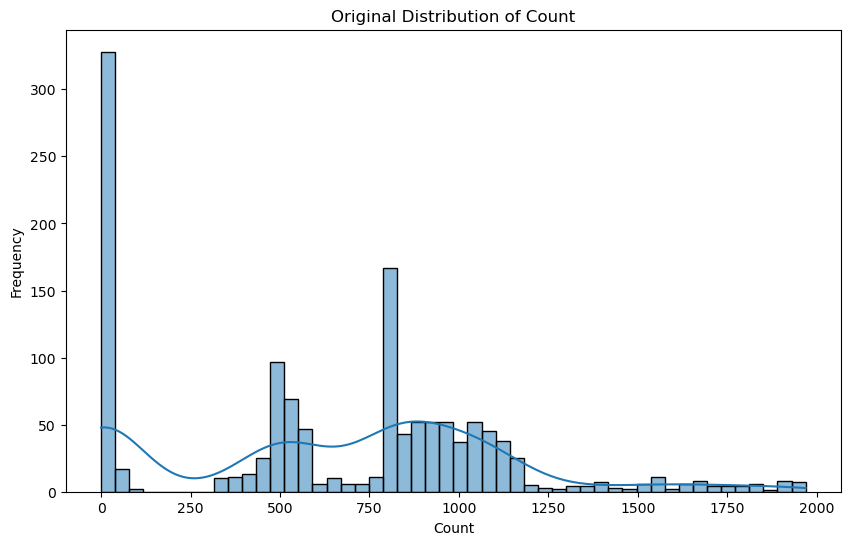

In [48]:
# Visualize the 'Count' column of the cleaned data

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Count'], bins=50, kde=True)
plt.title('Original Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Step 2: Calculate skewness of 'Count' in the clean data
skewness = data_cleaned['Count'].skew()
print(f' Count Skewness: {skewness}')

 Count Skewness: 0.21963643575760872


Remarks : 
* The skewness of the 'Count' column is very very mildly skewed, which we can approximate as normally distributed.
----



## Feature Extraction
---

#### From the column 'Percentage' we calculate the Total Swipes : Count/Percentage

In [50]:
data_cleaned['Total_Swipe'] = (data_cleaned['Count'] / data_cleaned['Percentage'])
data_cleaned.shape

/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62569/3367489983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Total_Swipe'] = (data_cleaned['Count'] / data_cleaned['Percentage'])


(1318, 8)

In [51]:
# Step 2: Calculate skewness of 'Total_Swipe' in the clean data
original_skewness_swipe = data_cleaned['Total_Swipe'].skew()
print(f'Total swipes Skewness: {original_skewness_swipe}')

Total swipes Skewness: -0.14940799747561992


Remarks:
* The skewness of the 'Total_Swipe' column is very very mildly left skewed, which we can approximate as normally distributed.
---

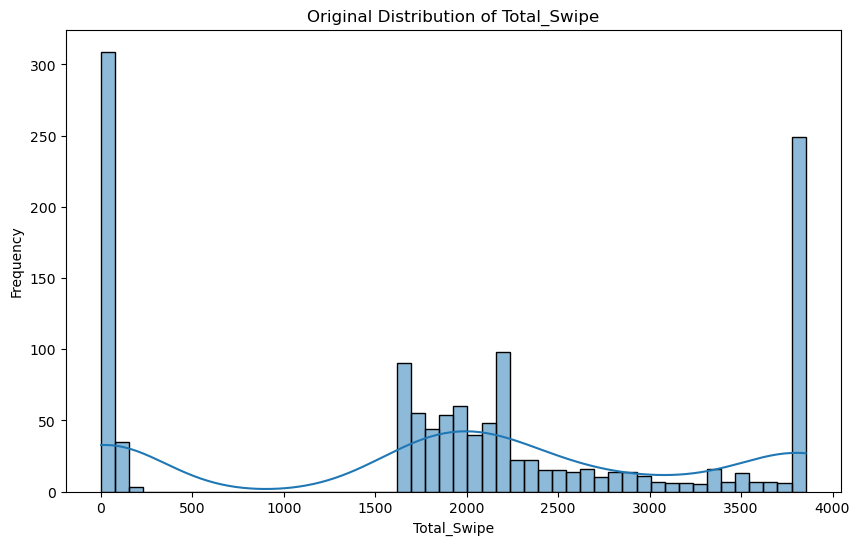

In [52]:
# Visualize the 'Total_Swipe' column of the cleaned data

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Total_Swipe'], bins=50, kde=True)
plt.title('Original Distribution of Total_Swipe')
plt.xlabel('Total_Swipe')
plt.ylabel('Frequency')
plt.show()

In [53]:
# the data looks currently like this : 
data_cleaned.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship,Total_Swipe
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0,2216.040172
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0,2157.108307
5,292896.2932,gender,"Meridian, Idaho",No,1091.176696,0.519163,0,2101.798521
7,293223.0000,university,University of Iowa,Yes,1.000000,0.333000,0,3.003003
8,292881.1384,mobile,"Meridian, Idaho",No,878.080463,0.228031,0,3850.704684


In [54]:
# Convert 'It became a relationship' column into boolean
data_cleaned['It became a relationship'] = data_cleaned['It became a relationship'].astype(bool)

/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62569/4279501027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['It became a relationship'] = data_cleaned['It became a relationship'].astype(bool)


## Boxplots of 'Count' and 'Percentage'
---

Text(0, 0.5, 'It Became a Relationship')

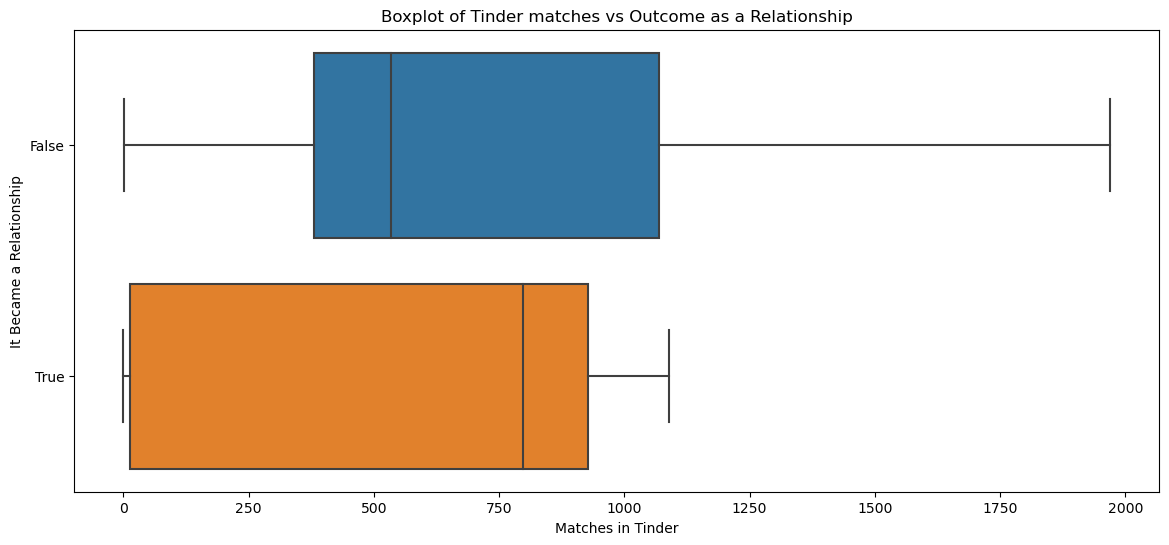

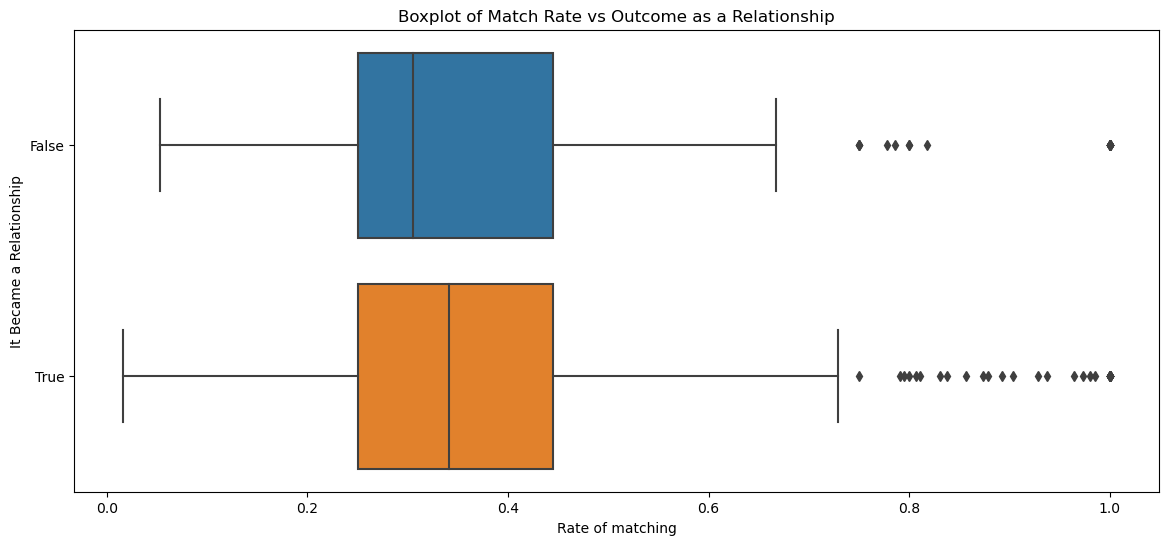

In [55]:
# Boxplot of match Count 
plt.figure(figsize=(14,6))
sns.boxplot(x=data_cleaned['Count'], y=data_cleaned['It became a relationship'].astype('category'))
plt.title('Boxplot of Tinder matches vs Outcome as a Relationship')
plt.xlabel('Matches in Tinder')
plt.ylabel('It Became a Relationship')

# Boxplot of match Percentage 
plt.figure(figsize=(14,6))
sns.boxplot(x=data_cleaned['Percentage'], y=data_cleaned['It became a relationship'].astype('category'))
plt.title('Boxplot of Match Rate vs Outcome as a Relationship')
plt.xlabel('Rate of matching')
plt.ylabel('It Became a Relationship')

Remarks:
* For both the boxplot it is seen that who answered 'yes' to the question of tinder leading to a relationship had both the higher count and percentage Median Values.
* COUNT boxplot 'Yes' Median value : Approx 800 , 'No' Median Value : Aprrox 600 - This says that users having more matches leads to relationships successfully usually.
* PERCENTAGE boxplot 'Yes' Median value : Approx 0.35 , 'No' Median Value : Aprrox 0.25 - This says that users having more Rate of Matching (Matches/Total Swipes) leads to relationships successfully usually.

## Data Exploration of the Categorical Columns
---

In [56]:
# Investigate unique values in categorical columns
cat_col = ['Segment type', 'Segment Description', 'Answer']
for col in cat_col:
    print('Unique values in "{}" column count: {}'.format(col, data_cleaned[col].nunique()))
    print(data_cleaned[col].unique())
    print('-'*30)

Unique values in "Segment type" column count: 3
['gender' 'university' 'mobile']
------------------------------
Unique values in "Segment Description" column count: 136
['Meridian, Idaho' 'University of Iowa' 'University of Wisconsin-Madison'
 'University of California, Davis' 'Cal Poly San Luis Obispo'
 'Wesleyan University' 'University of Delaware'
 'University of California, Santa Cruz' 'University of Colorado Boulder'
 'University of Georgia' 'Southern Methodist University'
 'University of Miami' 'University of Arizona'
 'Northern Illinois University' 'Yale University'
 'University of Washington' 'Ithaca College'
 'University of North Carolina' 'Westport, CT' 'University of Pittsburgh'
 'Johns Hopkins University' 'Indiana University' 'Vanderbilt University'
 'Miami University (Ohio)' 'Michigan Technological University'
 'Colby College' 'University of Tampa' 'Chapman University'
 'Washington University in St. Louis' 'Boston University'
 'Dartmouth College' 'Mobile respondents' 'Sant

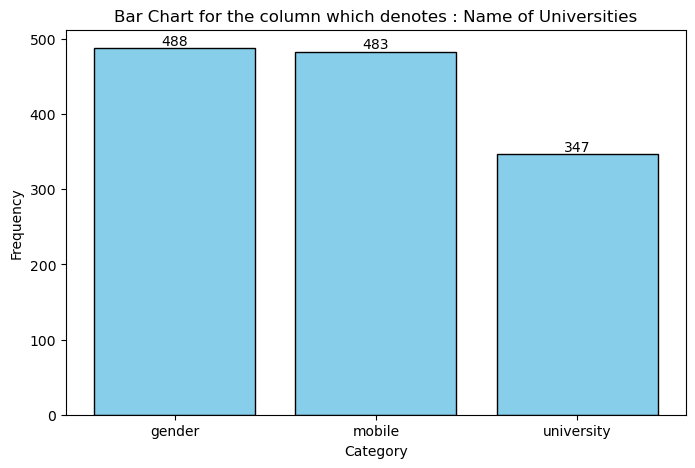

In [57]:
# Frequency of 'Segment type' unique value
category_st = data_cleaned['Segment type'].value_counts()


# Plotting the bar chart
plt.figure(figsize=(8, 5))  # Set the figure size
bars_st = plt.bar(category_st.index, category_st.values, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Bar Chart for the column which denotes : Name of Universities')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Annotating bars with the counts
for bar in bars_st:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


# Displaying the bar chart
plt.show()

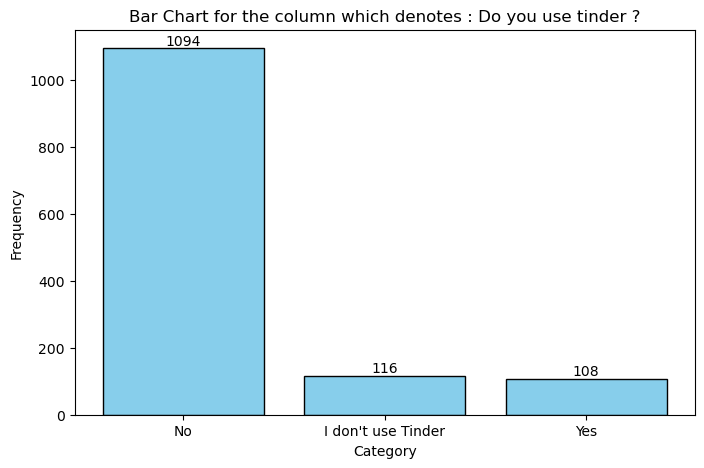

In [58]:
# Frequency of 'Answer' unique value
category_counts = data_cleaned['Answer'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))  # Set the figure size
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Bar Chart for the column which denotes : Do you use tinder ?')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Annotating bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


# Displaying the bar chart
plt.show()

----
Remarks : 
* We see here that the value for the Column 'Answer' is more frequently 'No'. This seems that the data is inconsistent as we have already removed the data which showed the 'Count' of matches in tinder as 0, so now the datapoint present in the dataset must have users who uses tinder. Otherwise they would not have a 'Count' of matches in Tinder. This could happen as data is collected from various different sources and collaborated as a dataset.
* Also, We don't know the difference between the value : 'I don't use Tinder' and 'No'.

In [59]:
# 'Segment Description' unique value counts
data_cleaned['Segment Description'].value_counts(ascending=True)

Old Dominion University                 1
University of Wisconsin-Whitewater      1
Randolph-Macon College                  1
Florida International University        1
Elon University                         1
                                     ... 
University of Washington                9
University of Mississippi               9
University of Southern California       9
University of Pennsylvania             12
Meridian, Idaho                       962
Name: Segment Description, Length: 136, dtype: int64

# Statistical Test 

**Question: In average, do people end up in relationship via Tinder have greater success rate in matching than those who do not?**

#### H0 : There is no relationship between tinder match percentage and finding a relationship in tinder
#### H1 : There is a relationship between tinder match percentage and finding a relationship in tinder

#### 95 % Confidence Interval : alpha = 0.05
---

### Let's start the 2 sample test

Remarks : 
* We use a 2 sample T test between 2 groups on the 'difference of mean' of 2 groups 'Percentage' Columns (as 'Percentage' column denotes Count of Matches/ Total Swipes). 
* The 2 groups are : people who have successfully ended up in a relationship using tinder and the other group is of people who have used tinder but were unsuccessful in the relationship. 
* We plan to do the test in a randomized way where we run a for loop for multiple times calculating the difference of Percentage mean between the samples of 2 groups.
* Everytime we have the difference of Percentage mean value, we save it in an array and finally plot it.
* Once it is plotted, we calcualate the p-value : the total probability that the value of 'difference of Percentage mean' exceeds the value of the original dataset's 'difference of Percentage mean'. The original dataset's 'difference of Percentage mean' is denoted with a red dash line

In [60]:
# Function to calculate difference of a function (ex. mean)
def diff_func(data_1, data_2, func=np.mean):
    difference = func(data_1) - func(data_2)
    return difference

# Function to grab column value to compare for those found relationship in tinder versus not 
def initial_sample(df=data_cleaned, col_to_compare='Percentage'):
    rel_yes = df[df['It became a relationship']][col_to_compare]
    rel_no = df[df['It became a relationship']!=True][col_to_compare]
    return rel_yes, rel_no

# Create bootstrapped samples using permutation
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    permuted_data1 = permuted_data[:len(data1)]
    permuted_data2 = permuted_data[len(data1):]
    
    return permuted_data1, permuted_data2

# Conduct null hypothesis test with bootstrapped samples
def bootstrap_testing(df, col_to_compare, func, size=1):
    data1, data2 = initial_sample(df, col_to_compare)
    difference = diff_func(data1, data2, func)
    
    sample_stat = [] # initialize a list to store bootstrapped sample statistics
    
    for i in range(size):
        permuted_data1, permuted_data2 = permutation_sample(data1, data2)  # Dataset sampled into 2 parts
        permuted_diff = diff_func(permuted_data1, permuted_data2, func)  # Calculating the difference of mean between the mean of Perentage of the 2 groups 
        sample_stat.append(permuted_diff) # Appending the 'difference of mean' value for each experiment
    
    sample_stat = np.array(sample_stat)
    
    plt.figure(figsize=(14,8))
    ax = sns.histplot(sample_stat)
    ax.axvline(difference, linestyle='--', color='red')
    plt.title('Distribution of bootstraped sample stat versus original sample stat (dashed)')
    
    pval = np.sum(difference <= sample_stat)/len(sample_stat)
    print('Test result : p-value of {}'.format(pval))
    return pval

Test result : p-value of 0.0059


0.0059

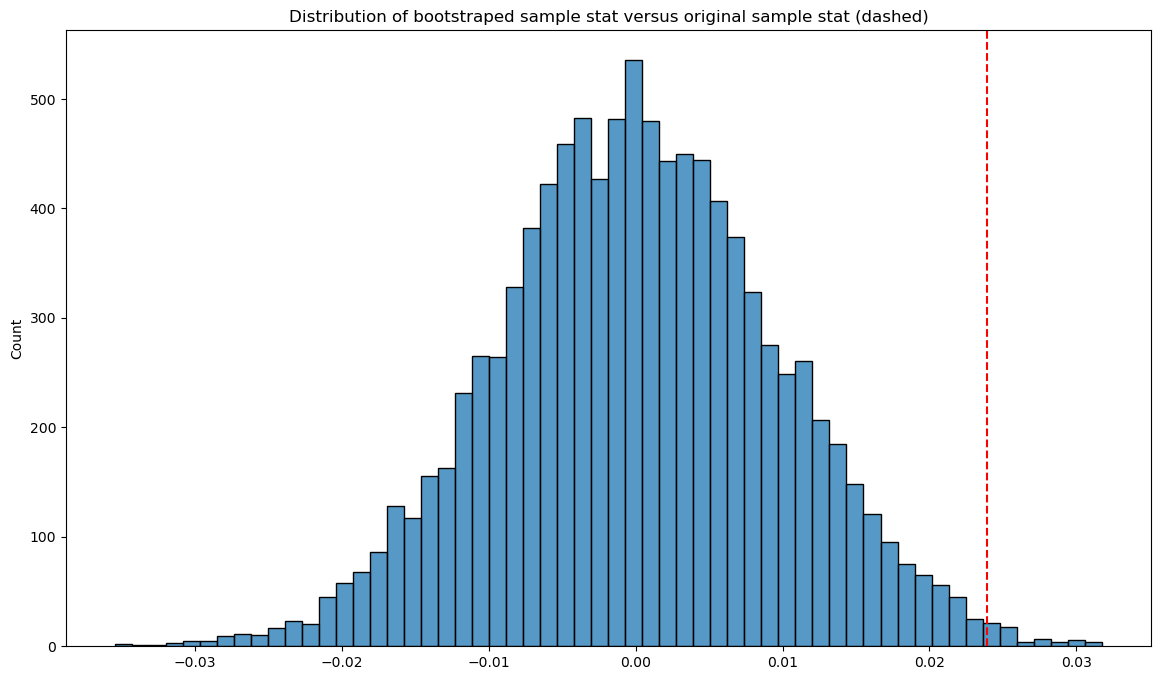

In [61]:
# Perform the test with 10000 iterations on difference in mean of 'percentage' for those who found relationship in tinder versus those who did not 
np.random.seed(5)
bootstrap_testing(df=data_cleaned, col_to_compare='Percentage', func=np.mean, size=10000)

### P-value is 0.0059 which is significantly under 0.05 and therefore I reject the null hypothesis that " there is no relationship between match percentage and finding a relationship in tinder "
---

## Data Preprocessing
---

In [62]:
data_filtered = df_class_train[df_class_train['Count'] != 0]

# Creating copy of data_filtered dataset for any preprocessing
data_filtered_copy1 = data_filtered.copy()
data_filtered_copy1

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0
5,292896.2932,gender,"Meridian, Idaho",No,1091.176696,0.519163,0
7,293223.0000,university,University of Iowa,Yes,1.000000,0.333000,0
8,292881.1384,mobile,"Meridian, Idaho",No,878.080463,0.228031,0
...,...,...,...,...,...,...,...
1886,292898.4195,mobile,"Meridian, Idaho",No,844.784936,0.452261,1
1888,293489.5656,university,Washington State University,No,1.282776,0.973513,1
1892,292881.6932,mobile,"Meridian, Idaho",No,1203.190399,0.312360,0
1893,292900.8499,gender,"Meridian, Idaho",No,806.378820,0.488025,0


In [63]:
# Drop column 'ID'
data_filtered_copy1 = data_filtered_copy1.drop(columns=['ID'])

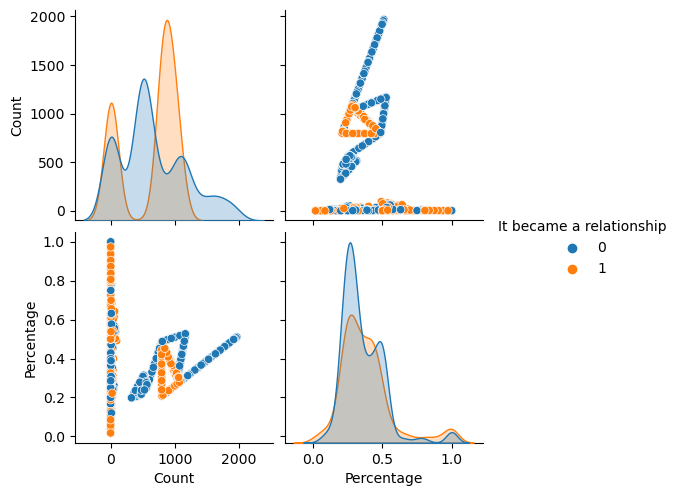

In [64]:
# Pair plot
sns.pairplot(data_filtered_copy1, hue='It became a relationship')

In [65]:
# Dimension of the train data : 
data_filtered.shape

(1318, 7)

In [66]:
print(data_filtered['Segment Description'].value_counts())
print('\n')

Meridian, Idaho                      962
University of Pennsylvania            12
University of Washington               9
University of Mississippi              9
University of Southern California      9
                                    ... 
University of Buffalo                  1
Randolph-Macon College                 1
Mississippi State University           1
Penn State University                  1
Old Dominion University                1
Name: Segment Description, Length: 136, dtype: int64




Remarks : 
* We see here that the cleaned dataset has 1306 rows and out of those 962 rows are having 'Segment Description' as Meridian, Idaho. As we can replace those with the value '1' and the other 344 row's 'Segment Description' value as '0' , as part of data preprocessing.

In [67]:
# Replace Other universities
data_filtered_copy1['Segment Description'].replace(['University of Iowa',
       'University of Wisconsin-Madison',
       'University of California, Davis', 'Cal Poly San Luis Obispo',
       'Wesleyan University', 'University of Delaware',
       'University of California, Santa Cruz',
       'University of Colorado Boulder', 'University of Georgia',
       'Southern Methodist University', 'University of Miami',
       'University of Arizona', 'Northern Illinois University',
       'Yale University', 'University of Washington', 'Ithaca College',
       'University of North Carolina', 'Westport, CT',
       'University of Pittsburgh', 'Johns Hopkins University',
       'Indiana University', 'Vanderbilt University',
       'Miami University (Ohio)', 'Michigan Technological University',
       'Colby College', 'University of Tampa', 'Chapman University',
       'Washington University in St. Louis', 'Boston University',
       'Dartmouth College', 'Mobile respondents',
       'Santa Clara University', 'University of Mississippi',
       'Appalachian State University', 'Tufts University',
       'Male respondents', 'Randolph-Macon College',
       'University of Pennsylvania', 'Ohio State University',
       'New York University', 'Florida International University',
       'University of Notre Dame', 'United States Naval Academy',
       'University of Denver', 'Union College', 'Columbia University',
       'Cornell University', 'University of Tennessee',
       'Washington State University', 'Northern Arizona University',
       'Butler University', 'University of Missouri',
       'University of Maryland', 'Massachusetts Institute of Technology',
       'Colorado State University',
       'University of California, Los Angeles', 'Stanford University',
       'University of Rochester', 'University of Arkansas',
       'Ohio University', 'University of Central Oklahoma',
       'University of Oregon', 'University of Virginia',
       'Arizona State University', 'University of California, Berkeley',
       'Purdue University', 'University of Chicago',
       'Brigham Young University', 'Princeton University',
       'Cal State Northridge', 'University of Wisconsin, Eau Claire',
       'Carnegie Mellon University', 'Case Western Reserve University',
       'Arkansas State University', 'Marquette University',
       'Texas Christian University', 'Female respondents',
       'University of Wisconsin-La Crosse', 'Vassar College',
       'Loyola University Maryland', 'Illinois State',
       'University of Connecticut', 'Rochester Institute of Technology',
       'University of Kentucky', 'Roger Williams University',
       'University of Texas', 'Northwestern University',
       'University of Illinois', 'University of Alabama',
       'Georgetown University', 'University of California, Santa Barbara',
       'Morehead State University', 'Baylor University',
       'Clemson University', 'Loyola Marymount University',
       'University of Kansas', 'University of Richmond',
       'Texas A&M University', 'University of Buffalo',
       'University of Southern California', 'University of Minnesota',
       'Syracuse University', 'University of Dayton',
       'Mississippi State University', 'Skidmore College',
       'Penn State University', 'University of Michigan',
       'Elon University', 'UMass Amherst', 'Rice University ',
       'Providence College', 'Emory University', 'Williams College',
       'University of Wisconsin-Whitewater', 'University of Maine',
       'Pepperdine University', 'Whatsgoodly University',
       'Lehigh University', 'University of St Andrews',
       'George Washington University', 'Louisiana State University',
       'Centre College', 'College of William and Mary',
       'Quinnipiac University', 'University of California, San Diego',
       'Texas Tech University', 'University of Oklahoma',
       'Florida State University', 'James Madison University',
       'Iowa State University', 'San Diego State University',
       'Middlebury College', 'Tulane University',
       'University of Central Florida', 'Old Dominion University'], 'Other_Segment_description', inplace = True)

In [68]:
# Checking unique values as -
print(f"Unique values in Segment Description are {data_filtered_copy1['Segment Description'].unique()}.")

Unique values in Segment Description are ['Meridian, Idaho' 'Other_Segment_description'].


In [69]:
# Replaceing 'Other_Segment_description', 'Meridian, Idaho' with '0', '1' with respectively as -
data_filtered_copy1['Segment Description'].replace(['Other_Segment_description', 'Meridian, Idaho'], ['0', '1'], inplace = True)

In [70]:
# Display Value counts for 'Other_Segment_description', 'Meridian, Idaho' respectively as -
print(">>> Tinder data_filtered_copy1 - Segment Description - ")
print("-" * 40)
print(data_filtered_copy1['Segment Description'].value_counts())
print('\n')

>>> Tinder data_filtered_copy1 - Segment Description - 
----------------------------------------
1    962
0    356
Name: Segment Description, dtype: int64




In [71]:
# Display Value counts for 'gender', 'mobile','university' respectively as -
print(">>> Tinder data_filtered_copy1 - Segment type - ")
print("-" * 40)
print(data_filtered_copy1['Segment type'].value_counts())
print('\n')

>>> Tinder data_filtered_copy1 - Segment type - 
----------------------------------------
gender        488
mobile        483
university    347
Name: Segment type, dtype: int64




In [72]:
# Split the training dataset (data_filtered_copy1) into X and y
X = data_filtered_copy1.iloc[:, :-1]
y = data_filtered_copy1.iloc[:, -1]

In [73]:
X

,Segment type,Segment Description,Answer,Count,Percentage
2,gender,1,No,499.173606,0.225255
4,gender,1,No,455.925963,0.211360
5,gender,1,No,1091.176696,0.519163
7,university,0,Yes,1.000000,0.333000
8,mobile,1,No,878.080463,0.228031
...,...,...,...,...,...
1886,mobile,1,No,844.784936,0.452261
1888,university,0,No,1.282776,0.973513
1892,mobile,1,No,1203.190399,0.312360
1893,gender,1,No,806.378820,0.488025


In [74]:
y

2       0
4       0
5       0
7       0
8       0
       ..
1886    1
1888    1
1892    0
1893    0
1894    0
Name: It became a relationship, Length: 1318, dtype: int64

#### # One Hot Encoding on the dataset 'X' for the Columns : Answer, Segment Description and Segment type
---

In [75]:
X_train_encoded = pd.get_dummies(X, prefix=['Segment_type_', 'Segment_description_', 'Answer_'], drop_first=True)
X_train_encoded

,Count,Percentage,Segment_type__mobile,Segment_type__university,Segment_description__1,Answer__No,Answer__Yes
2,499.173606,0.225255,0,0,1,1,0
4,455.925963,0.211360,0,0,1,1,0
5,1091.176696,0.519163,0,0,1,1,0
7,1.000000,0.333000,0,1,0,0,1
8,878.080463,0.228031,1,0,1,1,0
...,...,...,...,...,...,...,...
1886,844.784936,0.452261,1,0,1,1,0
1888,1.282776,0.973513,0,1,0,1,0
1892,1203.190399,0.312360,1,0,1,1,0
1893,806.378820,0.488025,0,0,1,1,0


In [76]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 2 to 1894
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Count                     1318 non-null   float64
 1   Percentage                1318 non-null   float64
 2   Segment_type__mobile      1318 non-null   uint8  
 3   Segment_type__university  1318 non-null   uint8  
 4   Segment_description__1    1318 non-null   uint8  
 5   Answer__No                1318 non-null   uint8  
 6   Answer__Yes               1318 non-null   uint8  
dtypes: float64(2), uint8(5)
memory usage: 37.3 KB


## Model Training
---

#### Importing packages
---

In [77]:
# Loading required Packages for modeling & Data Preprocessing

# Model_selection Packages
from sklearn.model_selection import train_test_split

# Machine Learning Model Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay


# Model Evaluating Packages
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#### Sampling of data
---

In [78]:
# Split train dataset in Train and test to test the performance matrix of the model
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y, test_size = .25, random_state=0)
print(f"Shape of - X_train {X_train.shape}, X_test {X_test.shape}, y_train {y_train.shape}, y_test {y_test.shape}.")

Shape of - X_train (988, 7), X_test (330, 7), y_train (988,), y_test (330,).


### Logistic Regression
---

In [79]:
from sklearn.linear_model import LogisticRegression


# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7606060606060606
Confusion Matrix:
 [[141  39]
 [ 40 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       180
           1       0.74      0.73      0.74       150

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



/Users/sony/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression Accuracy Score : 0.76
---

### LDA
---

Confusion matrix (rows: true classes, col: predicted classes)
[[140  40]
 [ 44 106]]


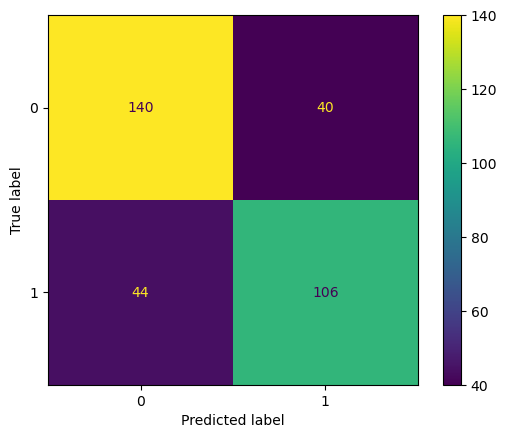

In [80]:
# create LDA model
lda = LinearDiscriminantAnalysis(store_covariance=True)

# fit the parameters
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)

# confusion matrix
cm_lda = metrics.confusion_matrix(y_test, y_pred_lda)
print('Confusion matrix (rows: true classes, col: predicted classes)')
print(cm_lda)

# plot confusion matrix
#disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp = metrics.ConfusionMatrixDisplay(cm_lda, display_labels=lda.classes_)
disp.plot()
plt.show()

In [81]:
# Fraction of correctly predicted samples in test set
ac_lda = metrics.accuracy_score(y_test, y_pred_lda, normalize=True)
print(f'Accuracy (fraction of correctly predicted samples on test set): {ac_lda:.3f}')

Accuracy (fraction of correctly predicted samples on test set): 0.745


In [82]:
# some indicators
rep_lda = metrics.classification_report(y_test, y_pred_lda)
print(rep_lda)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       180
           1       0.73      0.71      0.72       150

    accuracy                           0.75       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.75      0.75      0.75       330



### LDA Accuracy Score : 0.74
---

### QDA
---

Confusion matrix (rows: true classes, col: predicted classes)
[[140  40]
 [ 44 106]]


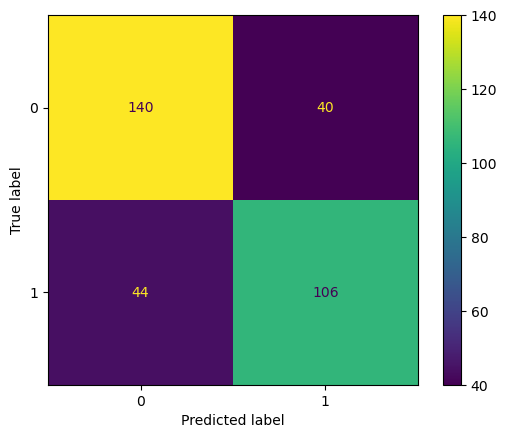

In [83]:
# create QDA model
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

# fit the parameters
qda.fit(X_train, y_train)

y_pred_qda = lda.predict(X_test)

# confusion matrix
cm_qda = metrics.confusion_matrix(y_test, y_pred_qda)
print('Confusion matrix (rows: true classes, col: predicted classes)')
print(cm_qda)

# plot confusion matrix
#disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp = metrics.ConfusionMatrixDisplay(cm_qda, display_labels=qda.classes_)
disp.plot()
plt.show()

In [84]:
# Fraction of correctly predicted samples in test set
ac_qda = metrics.accuracy_score(y_test, y_pred_qda, normalize=True)
print(f'Accuracy (fraction of correctly predicted samples on test set): {ac_qda:.3f}')

Accuracy (fraction of correctly predicted samples on test set): 0.745


In [85]:
# some indicators
rep_qda = metrics.classification_report(y_test, y_pred_qda)
print(rep_qda)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       180
           1       0.73      0.71      0.72       150

    accuracy                           0.75       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.75      0.75      0.75       330



### QDA Accuracy Score : 0.74
---

### Naive Bayes Classifier
---

In [86]:
# create NB model
nb = GaussianNB()

# fit the parameters
nb.fit(X_train, y_train)

GaussianNB()

Confusion matrix (rows: true classes, col: predicted classes)
[[134  46]
 [ 59  91]]


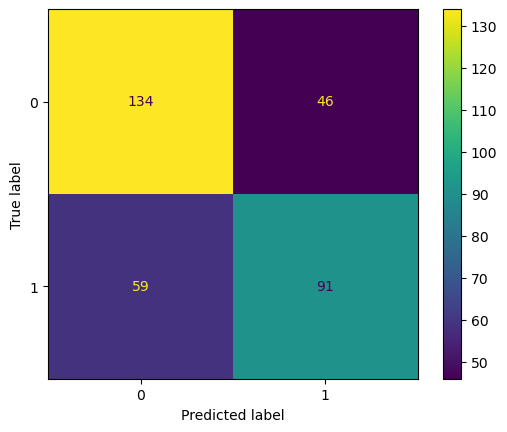

In [87]:
# predictions using training set (by default, the threshold over the posterior is 0.5)
y_pred_nb = nb.predict(X_test)

# confusion matrix
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)
print('Confusion matrix (rows: true classes, col: predicted classes)')
print(cm_nb)

# plot confusion matrix
#disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp = metrics.ConfusionMatrixDisplay(cm_nb, display_labels=nb.classes_)
disp.plot()
plt.show()

In [88]:
# Fraction of correctly predicted samples in test set
ac_nb = metrics.accuracy_score(y_test, y_pred_nb, normalize=True)
print(f'Accuracy (fraction of correctly predicted samples on test set): {ac_nb:.3f}')

Accuracy (fraction of correctly predicted samples on test set): 0.682


In [89]:
# some indicators
rep_nb = metrics.classification_report(y_test, y_pred_nb)
print(rep_nb)

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       180
           1       0.66      0.61      0.63       150

    accuracy                           0.68       330
   macro avg       0.68      0.68      0.68       330
weighted avg       0.68      0.68      0.68       330



### Naive Bayes Accuracy Score : 0.682
---

### KNN
---

In [90]:
# create KNN model, K = #neighbors
K = 3
knn = KNeighborsClassifier(n_neighbors=K)

# fit the parameters
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Confusion matrix (rows: true classes, col: predicted classes)
[[148  32]
 [ 26 124]]


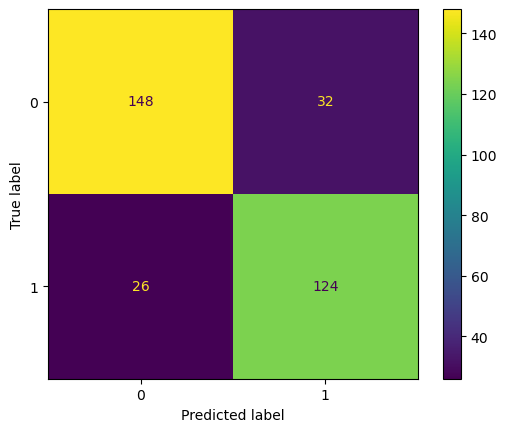

In [91]:
# predictions using training set (by default, the threshold over the posterior is 0.5)
y_predk = knn.predict(X_test)

# confusion matrix
cmk = metrics.confusion_matrix(y_test, y_predk)
print('Confusion matrix (rows: true classes, col: predicted classes)')
print(cmk)

# plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(cmk, display_labels=knn.classes_)
disp.plot()
plt.show()

In [92]:
#Fraction of correctly predicted samples in test set
ack = metrics.accuracy_score(y_test, y_predk, normalize=True)
print(f'Accuracy (fraction of correctly predicted samples on test set): {ack:.3f}')

Accuracy (fraction of correctly predicted samples on test set): 0.824


In [93]:
# some indicators
repk = metrics.classification_report(y_test, y_predk)
print(repk)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       180
           1       0.79      0.83      0.81       150

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.83      0.82      0.82       330



### KNN Accuracy Score : 0.824
---
Remarks:
* Although KNN does not need train, still checking with the training set shows that in this dataset it works with the highest Accuracy score compared to other classification model.

---
### The KNN model is best for predicting the test dataset as its accuracy score is highest.
---

## Data Prepreprocessing of the Test dataset
---

#### Test Dataset

In [94]:
df_class_test1 = pd.read_csv('test.csv')

In [95]:
# Test data
df_class_test = pd.read_csv('test.csv')

In [96]:
df_class_test['Segment Description'].unique()

array(['University of California, Davis', 'Meridian, Idaho',
       'Westport, CT', 'San Diego State University', 'UMass Amherst',
       'Iowa State University', 'Minnesota State University Mankato',
       'University of Rochester', 'University of Mississippi',
       'Columbia University', 'Lehigh University',
       'Mississippi State University', 'Indiana University',
       'St. Lawrence University', 'University of Notre Dame',
       'Duke University', 'North Carolina State',
       'University of Central Oklahoma', 'Castleton State College',
       'Michigan Technological University', 'University of Pennsylvania',
       'Miami University (Ohio)', 'Brigham Young University',
       'University of Wisconsin-La Crosse', 'Texas Tech University',
       'Boston College', 'Tulane University', 'University of Oregon',
       'Mobile respondents', 'University of Wisconsin-Whitewater',
       'University of Kentucky', 'Southern Methodist University',
       'Northwestern University', 'M

In [97]:
print(df_class_test['Segment Description'].value_counts())
print('\n')

Meridian, Idaho                       464
University of Notre Dame                5
University of California, Berkeley      4
University of Rochester                 4
University of Mississippi               4
                                     ... 
University of Tampa                     1
Ohio University                         1
Florida State University                1
Elon University                         1
Ohio State University                   1
Name: Segment Description, Length: 101, dtype: int64




In [98]:
# Replace Other universities
df_class_test['Segment Description'].replace(['Westport, CT', 'San Diego State University', 'UMass Amherst',
       'Iowa State University', 'Minnesota State University Mankato',
       'University of Rochester', 'University of Mississippi',
       'Columbia University', 'Lehigh University',
       'Mississippi State University', 'Indiana University',
       'St. Lawrence University', 'University of Notre Dame',
       'Duke University', 'North Carolina State',
       'University of Central Oklahoma', 'Castleton State College',
       'Michigan Technological University', 'University of Pennsylvania',
       'Miami University (Ohio)', 'Brigham Young University',
       'University of Wisconsin-La Crosse', 'Texas Tech University',
       'Boston College', 'Tulane University', 'University of Oregon',
       'Mobile respondents', 'University of Wisconsin-Whitewater',
       'University of Kentucky', 'Southern Methodist University',
       'Northwestern University', 'Michigan State University',
       'University of Texas', 'Whatsgoodly University', 'Yale University',
       'University of Michigan', 'Baylor University',
       'University of California, Berkeley', 'University of Virginia',
       'Penn State University', 'Wesleyan University',
       'Randolph-Macon College', 'University of California, Los Angeles',
       'University of North Carolina', 'Middlebury College',
       'Case Western Reserve University', 'University of Georgia',
       'University of Iowa', 'Georgetown University',
       'Gonzaga University', 'Oregon State University',
       'Bucknell University', 'University of Missouri',
       'University of Florida', 'University of Pittsburgh',
       'Loyola University Maryland', 'Washington State University',
       'Syracuse University', 'University of Tampa',
       'Sacred Heart University', 'University of Alabama',
       'University of Southern California', 'Ohio University',
       'Florida State University', 'Elon University',
       'University of Wisconsin, Eau Claire', 'Auburn University',
       'College of William and Mary', 'Skidmore College',
       'University of Kansas', 'University of Wisconsin-Madison',
       'Harvard University', 'Louisiana State University',
       'University of Illinois', 'Appalachian State University',
       'Northern Arizona University', 'Centre College',
       'University of California, Santa Cruz', 'University of Buffalo',
       'University of Dayton', 'University of Oklahoma',
       'Marquette University', 'University of Colorado Boulder',
       'Tufts University', 'Emory University',
       'Washington University in St. Louis', 'Princeton University',
       'Clemson University', 'University of Washington',
       'James Madison University', 'University of Miami',
       'University of St Andrews', 'Carnegie Mellon University',
       'Arkansas State University', 'Vanderbilt University',
       'Illinois State', 'Vassar College', 'Texas Christian University',
       'Ohio State University','University of California, Davis'], 'Other_Segment_description', inplace = True)

In [99]:
# Checking unique values as -
print(f"Unique values in Segment Description are {df_class_test['Segment Description'].unique()}.")

Unique values in Segment Description are ['Other_Segment_description' 'Meridian, Idaho'].


In [100]:
# Replaceing 'Other_Segment_description', 'Meridian, Idaho' with '0', '1' with respectively as -
df_class_test['Segment Description'].replace(['Other_Segment_description', 'Meridian, Idaho'], ['0', '1'], inplace = True)

In [101]:
# Display Value counts for 'Other_Segment_description', 'Meridian, Idaho' respectively as -
print(">>> Tinder df_class_test - Segment Description - ")
print("-" * 40)
print(df_class_test['Segment Description'].value_counts())
print('\n')

>>> Tinder df_class_test - Segment Description - 
----------------------------------------
1    464
0    168
Name: Segment Description, dtype: int64




In [102]:
print(df_class_test1['Segment type'].value_counts())
print('\n')

web           171
university    168
mobile        149
gender        144
Name: Segment type, dtype: int64




Remarks :
* There is a extra value 'web' in the column 'Segment Type' which is not present in Train dataset. So as the model is not being trained with 'web' as value, we need to also remove it from the test dataset. This might be due to data inconsistency.

In [103]:
value_to_remove = 'web'
df_class_test = df_class_test[df_class_test['Segment type'] != value_to_remove]

In [104]:
print(df_class_test['Segment type'].value_counts())
print('\n')

university    168
mobile        149
gender        144
Name: Segment type, dtype: int64




In [105]:
df_class_test.shape

(461, 6)

In [106]:
X_test_encoded = pd.get_dummies(df_class_test, prefix=['Segment_type_', 'Segment_description_', 'Answer_'], drop_first=True)

In [107]:
# Drop column 'ID'
X_test_encoded = X_test_encoded.drop(columns=['ID'])
X_test_encoded

,Count,Percentage,Segment_type__mobile,Segment_type__university,Segment_description__1,Answer__No,Answer__Yes
0,0.230742,0.115371,0,1,0,0,1
2,0.000000,0.000000,0,1,0,0,1
3,1497.699982,0.388752,1,0,1,1,0
4,1439.464988,0.373646,1,0,1,1,0
5,5.000000,0.192000,0,1,0,0,1
...,...,...,...,...,...,...,...
624,1831.259947,0.475272,1,0,1,1,0
625,1051.115796,0.272914,1,0,1,1,0
626,3.000000,0.750000,0,1,0,1,0
627,1.000000,0.743904,0,1,0,0,1


## Predicting the result over the test data
---

In [108]:
Relationship_Status_Predict = knn.predict(X_test_encoded)
df_class_test['Predicted_Relationship_status']= Relationship_Status_Predict
df_class_test.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,Predicted_Relationship_status
0,292974.2311,university,0,Yes,0.230742,0.115371,1
2,293724.0350,university,0,Yes,0.000000,0.000000,1
3,292884.0724,mobile,1,No,1497.699982,0.388752,0
4,292882.0964,mobile,1,No,1439.464988,0.373646,0
5,292971.0000,university,0,Yes,5.000000,0.192000,1


## We have the predicted data in the column 'Predicted_Relationship_status' as per the KNN model classifier
---